## Проект: Обучение с учителем: качество модели

[yandex_practicum](https://practicum.yandex.ru/learn/data-scientist/courses/7003ed02-62c7-4cb8-96de-ac10f3bfb19e/sprints/197574/topics/b1bfd46b-95e3-44a8-81f7-6ef80f70a948/lessons/877ee7f1-972c-420b-bef9-26589625d782/)

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 


<font color='red'>Возможный выход — **удерживать активность постоянных клиентов**. Сделать это можно с помощью персонализированных предложений.</font>

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Стратегия решения

руководитель отдела сформировал ее таким образом:
1) Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: 
    - «снизилась», если клиент стал покупать меньше товаров, 
    - и «прежний уровень».

2) Нужно собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

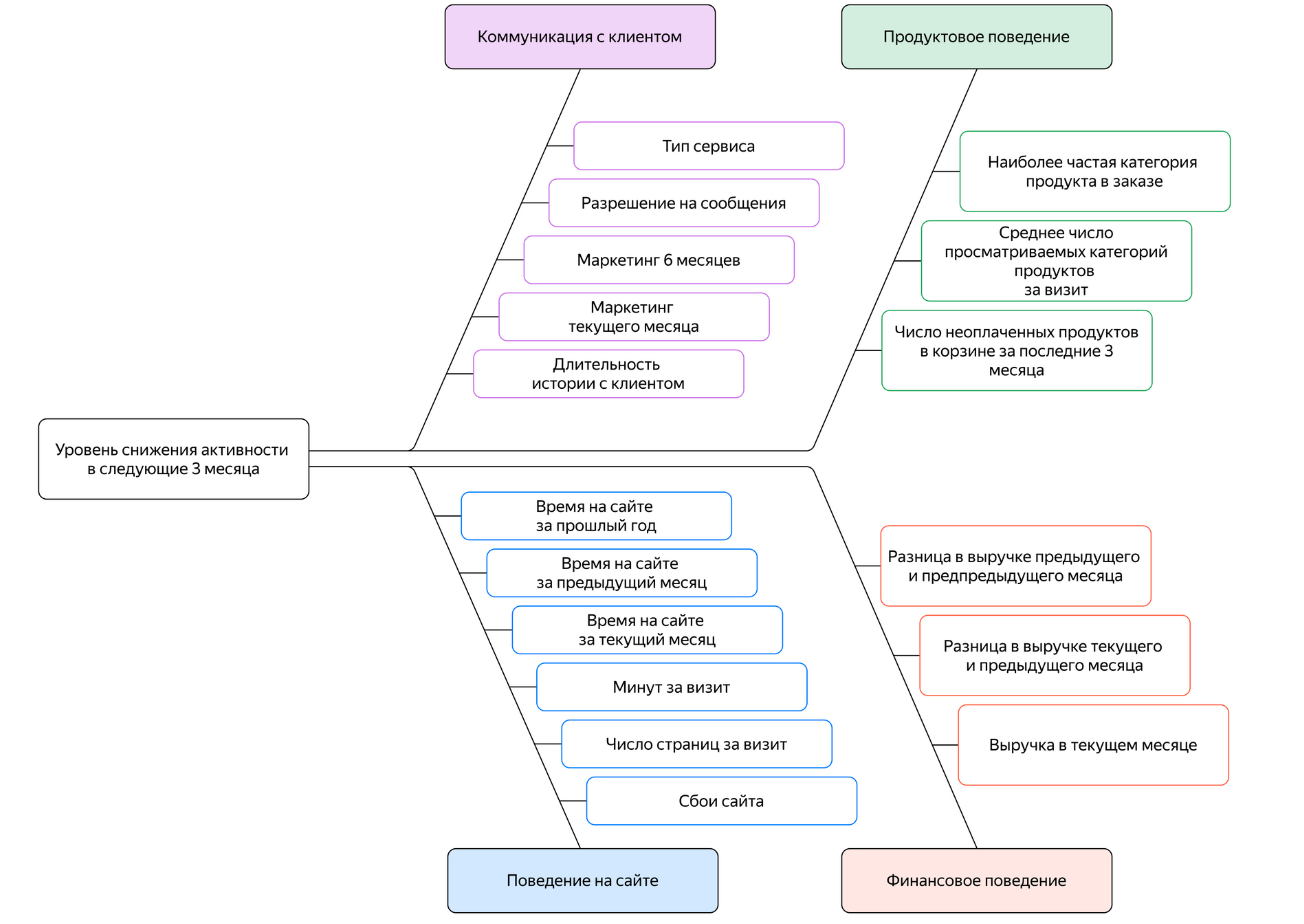

## Последовательность шагов


1) Нужно построить модель, которая предскажет <font color='red'>вероятность снижения покупательской активности клиента в следующие три месяца.</font>

2) В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой <font color='red'>доход</font> каждый покупатель приносил компании за <font color='red'>последние три месяца.</font>
3) Используя данные модели и данные о прибыльности клиентов, нужно <font color='red'>выделить сегменты покупателей и разработать для них персонализированные предложения.</font>


Предполагаемые сегменты (можно выбрать свои)
- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
- Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.

- Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
- Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.
- и др.

## Описание данных



### <font color='red'>Таблица market_file.csv.</font> 

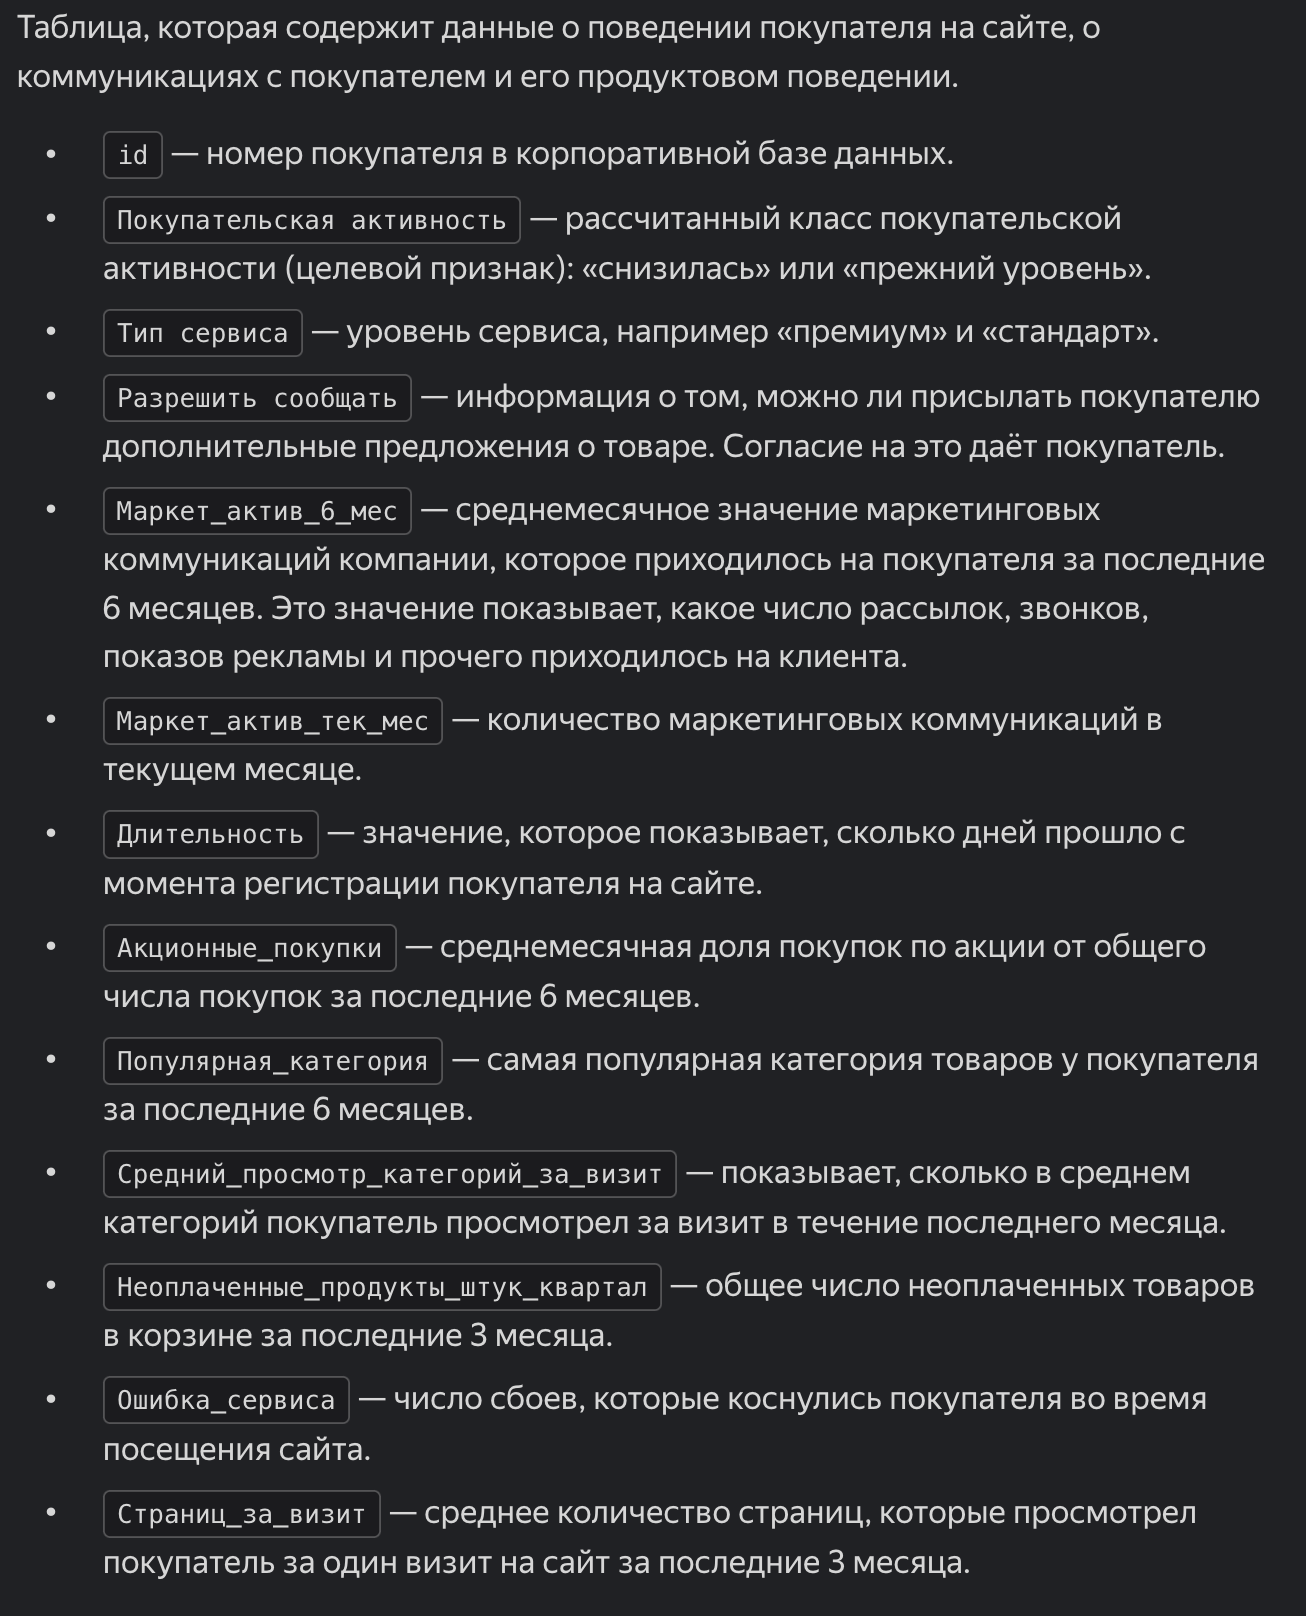

### <font color='red'>Таблица market_money.csv</font>


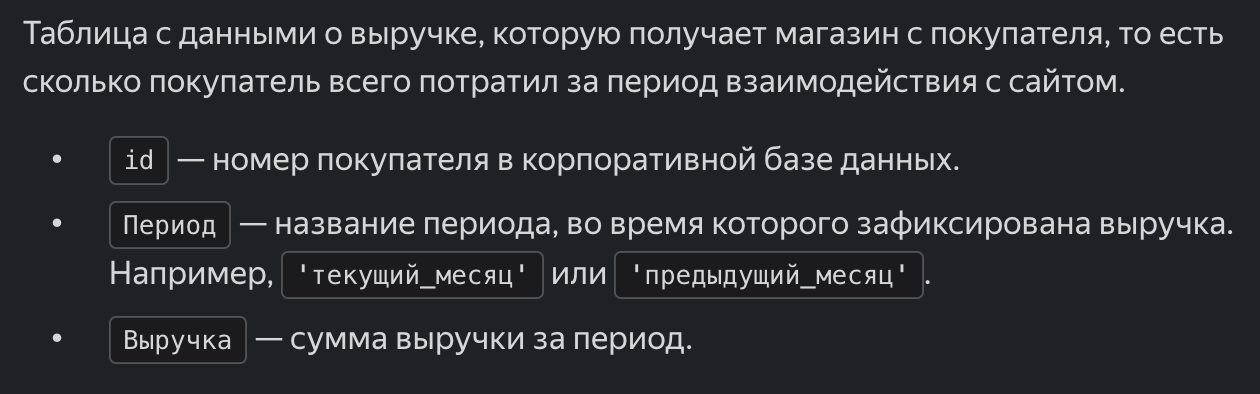

### <font color='red'>Таблица market_time.csv</font>

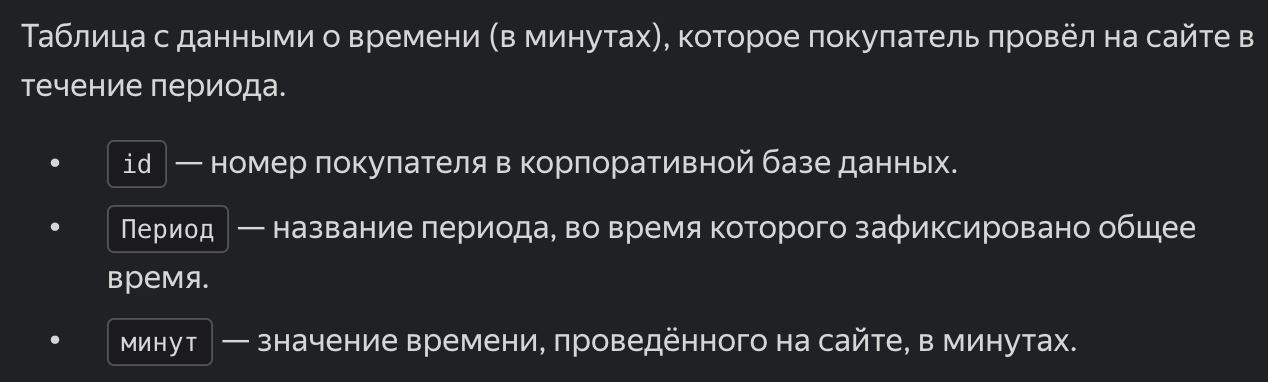


### <font color='red'>Таблица money.csv</font>

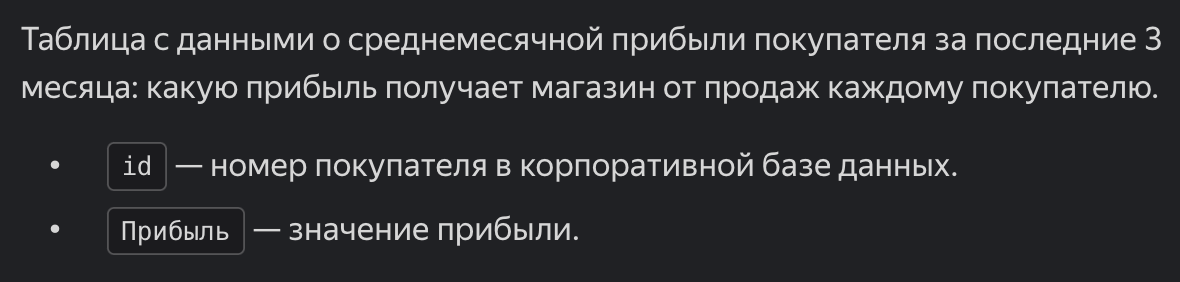


## Работа с проектом

### Шаг 1. Загрузка данных

In [1]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random

# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif


# библиотеки для пайплайнов
# класс ColumnTransformer помогает работать с данными разного типа в одном наборе
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score

# библиотека для анализа весов признаков
import shap

# библиотеки для логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# библиотека для метода опорных векторов
from sklearn.svm import SVC

# библиотека решающих деревьев
from sklearn.tree import DecisionTreeClassifier


# бибилиотека для графика ROC-кривой и расчёта ROC-AUC
from sklearn.metrics import roc_auc_score, RocCurveDisplay


# библиотека для модели классификации kNN 
from sklearn.neighbors import KNeighborsClassifier

# добавим библиотеку для построения scatter диаграмм рассеяния с тренд-линиями
import plotly.express as px 
import plotly.graph_objects as go

import math

In [2]:
try:
    market_df = pd.read_csv('/datasets/market_file.csv')
    market_money_df = pd.read_csv('/datasets/market_file.csv')
    market_time_df = pd.read_csv('/datasets/market_file.csv')
    money_df= pd.read_csv('/datasets/market_file.csv', sep=';',decimal=',')

except FileNotFoundError:
    market_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/8_supervised_learning/data/market_file.csv')
    market_money_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/8_supervised_learning/data/market_money.csv')
    market_time_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/8_supervised_learning/data/market_time.csv')
    money_df= pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/8_supervised_learning/data/money.csv', sep=';',decimal=',')


In [3]:
market_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
market_money_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [5]:
market_time_df.head() 

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [6]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Шаг 2. Предобработка данных


#### 2.1 Таблица market_df

In [7]:
market_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [8]:
market_df.shape

(1300, 13)

In [9]:
market_df.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Создадим словарь перевода названий столбцов в стандарт

In [10]:
col_name_dict = {
    'id': 'id', 
    'Покупательская активность': 'consum_activity', 
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'is_allow_report',
    'Маркет_актив_6_мес': 'market_activ_6_mon', 
    'Маркет_актив_тек_мес': 'market_activ_cur_mon', 
    'Длительность': 'duration',
    'Акционные_покупки': 'promo', 
    'Популярная_категория': 'pop_cat_goods',
    'Средний_просмотр_категорий_за_визит': 'mean_view_cat_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_goods_per_quater', 
    'Ошибка_сервиса': 'serv_error',
    'Страниц_за_визит': 'webpage_per_visit'
}

In [11]:
market_df.rename(columns=col_name_dict, inplace=True)

In [12]:
market_df.columns

Index(['id', 'consum_activity', 'service_type', 'is_allow_report',
       'market_activ_6_mon', 'market_activ_cur_mon', 'duration', 'promo',
       'pop_cat_goods', 'mean_view_cat_per_visit', 'unpaid_goods_per_quater',
       'serv_error', 'webpage_per_visit'],
      dtype='object')

In [15]:
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1300 non-null   int64  
 1   consum_activity          1300 non-null   object 
 2   service_type             1300 non-null   object 
 3   is_allow_report          1300 non-null   object 
 4   market_activ_6_mon       1300 non-null   float64
 5   market_activ_cur_mon     1300 non-null   int64  
 6   duration                 1300 non-null   int64  
 7   promo                    1300 non-null   float64
 8   pop_cat_goods            1300 non-null   object 
 9   mean_view_cat_per_visit  1300 non-null   int64  
 10  unpaid_goods_per_quater  1300 non-null   int64  
 11  serv_error               1300 non-null   int64  
 12  webpage_per_visit        1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


пропусков нет, смотрим на дубликаты - явные и неявные

In [18]:
market_df.duplicated().sum()

0

In [19]:
# запускаем цикл на проверку содержимого категориальных столбцов - ищем уникальные названия

for col in market_df.select_dtypes(exclude='number').columns.tolist():
    print(f'{col} : {market_df[col].unique()}')
    print()
    

consum_activity : ['Снизилась' 'Прежний уровень']

service_type : ['премиум' 'стандартт' 'стандарт']

is_allow_report : ['да' 'нет']

pop_cat_goods : ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']



In [23]:
market_df.loc[market_df.service_type== 'стандартт', "service_type"]= 'стандарт'

In [24]:
market_df.service_type.unique()

array(['премиум', 'стандарт'], dtype=object)

In [25]:
market_df.duplicated().sum()

0

Вывод: с дубликатами разобрались, ошибку устранили. пропусков в датасете нет

#### 2.2 Таблица market_money

In [26]:
market_money_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [27]:
market_money_df.shape

(3900, 3)

In [28]:
market_money_df['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Трансфоримруем таблицу для получения информации о выручке для каждого из периодов

In [37]:
transformed_df = market_money_df.pivot_table(index='id', columns='Период', values='Выручка', aggfunc='sum').reset_index()
transformed_df.columns.name = None
transformed_df.columns = ['id', 'last_last_rev', 'last_rev', 'current_rev']

transformed_df.head()

,id,last_last_rev,last_rev,current_rev
0,215348,0.0,0.0,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


In [39]:
market_money_df_tr = transformed_df
market_money_df_tr.shape

(1300, 4)

In [42]:
market_money_df_tr.duplicated().sum()

0

In [44]:
market_money_df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1300 non-null   int64  
 1   last_last_rev  1300 non-null   float64
 2   last_rev       1300 non-null   float64
 3   current_rev    1300 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 40.8 KB


Теперь размер выборки совпадает с размером market_df, а данные в столбцах отражают выручку за каждый период

дубликатов в таблице нет, пустых значений тоже

#### 2.3 Таблица market_time

In [40]:
market_time_df.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [45]:
market_time_df.shape

(2600, 3)

In [46]:
market_time_df['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

проведем ту же операцию по трансформации:
- разобьем периоды на текущий и предыдущий месяцы
- в значения столбцов попадут количество минут, проведенных пользователем на сайте 

In [47]:
market_time_df.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum').reset_index()

Период,id,предыдцщий_месяц,текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11
...,...,...,...
1295,216643,14,7
1296,216644,12,11
1297,216645,12,18
1298,216646,18,7


In [50]:
market_time_df_tr = market_time_df.pivot_table(index='id', columns='Период', values='минут', aggfunc='sum').reset_index()
market_time_df_tr.columns.name = None
market_time_df_tr.columns = ['id', 'last_dur_minutes', 'current_dur_minutes']

market_time_df_tr.head()

,id,last_dur_minutes,current_dur_minutes
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [52]:
market_time_df_tr.shape

(1300, 3)

In [53]:
market_time_df_tr.duplicated().sum()

0

In [54]:
market_time_df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id                   1300 non-null   int64
 1   last_dur_minutes     1300 non-null   int64
 2   current_dur_minutes  1300 non-null   int64
dtypes: int64(3)
memory usage: 30.6 KB


Теперь размер выборки совпадает с размером market_df, а данные в столбцах отражают длительность нахождения на сайте за каждый период

дубликатов в таблице нет, пустых значений тоже

#### 2.4 Таблица money

In [55]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [56]:
money_df.shape

(1300, 2)

In [57]:
money_df.duplicated().sum()

0

In [58]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


дубликатов, пустых значений в таблице нет

### Шаг 3. Исследовательский анализ данных
